In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/Models/singconv2.h5')

# Create a new model that outputs the activations of the last convolutional layer
last_conv_layer_model = keras.Model(inputs=model.inputs, outputs=model.get_layer('LAYER').output)


In [ ]:
#features = last_conv_layer_model.predict(X_train)


In [ ]:
kernel = np.ones((2, 2), np.uint8)
features_list = []
IMG_HEIGHT = 180
IMG_WIDTH = 180

for image in os.listdir(data_dir_train):
    impath = os.path.join(data_dir_train, image)
    im = glob.glob(impath + '/*.png')
    print(len(im))
    for j in im:
        img = cv2.imread(j)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA)
        #_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)
        #img = cv2.erode(img, kernel, iterations=1)
        #img = cv2.dilate(img, kernel, iterations=3)

        #feature extraction on the preprocessed images to obtain the features
        features = last_conv_layer_model.predict(np.expand_dims(img, axis=0))

        features_list.append(features)

# Convert the list of feature vectors into a numpy array
features_matrix = np.array(features_list)

# Reshape the features matrix to (num_images, 44, 44, 1)
features_matrix = features_matrix.reshape((-1, 44, 44, 1))


print(features_matrix.shape)


1344
1/1 [==============================] - 0s 19ms/step
2984
1/1 [==============================] - 0s 17ms/step
(4328, 44, 44, 1)


892
1600
2568
3747
2500
3776
2626
520
3315


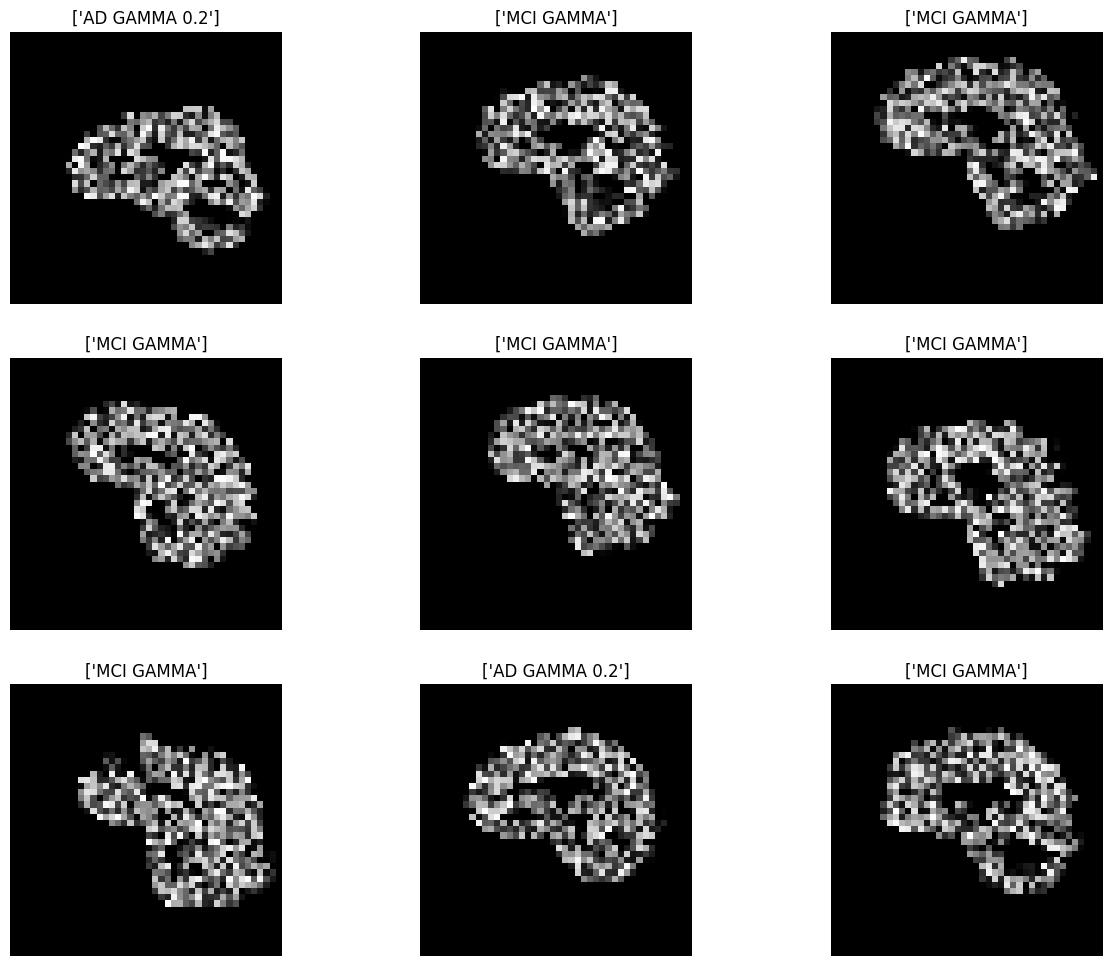

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# visualize images loaded with the keras utility (image_dataset_from_directory)

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(9):
    num=random.randint(0,4120)
    print(num)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(features_matrix[num].astype("uint8"), cmap= 'gray')
    plt.title([label[num]])
    plt.axis("off")